In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from datetime import datetime

In [2]:
wegodf = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wegodf.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wegodf['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

In [4]:
wegodf[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


In [5]:
wegodf['SCHEDULED_TIME'] = pd.to_datetime(wegodf['SCHEDULED_TIME'])

In [6]:
wegodf['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wegodf['ACTUAL_DEPARTURE_TIME'])

In [7]:
wegodf['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wegodf['ACTUAL_ARRIVAL_TIME'])

In [8]:
#useful for iterating over every column and seeing a sample of the unique values within each column:

for series_name, series in wegodf.items():
    print(series_name)
    print(wegodf[series_name].unique())

CALENDAR_ID
[120230801 120230802 120230803 120230804 120230805 120230806 120230807
 120230808 120230809 120230810 120230811 120230812 120230813 120230814
 120230815 120230816 120230817 120230818 120230819 120230820 120230821
 120230822 120230823 120230824 120230825 120230826 120230827 120230828
 120230829 120230830 120230831 120230901 120230902 120230903 120230904
 120230905 120230906 120230907 120230908 120230909 120230910 120230911
 120230912 120230913 120230914 120230915 120230916 120230917 120230918
 120230919 120230920 120230921 120230922 120230923 120230924 120230925
 120230926 120230927 120230928 120230929 120230930]
SERVICE_ABBR
[1 2 3]
ADHERENCE_ID
[ 99457890  99457891  99457892 ... 100406612 100406613 100406614]
DATE
['2023-08-01' '2023-08-02' '2023-08-03' '2023-08-04' '2023-08-05'
 '2023-08-06' '2023-08-07' '2023-08-08' '2023-08-09' '2023-08-10'
 '2023-08-11' '2023-08-12' '2023-08-13' '2023-08-14' '2023-08-15'
 '2023-08-16' '2023-08-17' '2023-08-18' '2023-08-19' '2023-08-20'

## 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [9]:
wegodf.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [10]:
wegodf['PREV_SCHED_STOP_CANCELLED'].value_counts().sort_index()

PREV_SCHED_STOP_CANCELLED
0.0    275746
1.0      4254
Name: count, dtype: int64

def create_id(row):
    row['CALENDAR_ID'] + ''

wegodf['CAL_TRIP'] = wegodf.apply(lambda row: str(row['CALENDAR_ID']) + '-' + str(row['TRIP_ID']), axis=1)

wegodf['CAL_TRIP'].nunique()

wegodf['CAL_TRIP'].dtype

wegodf.dtypes

wegodf['CAL_TRIP']

In [12]:
#Headway deviation percentage as per read me file
wegodf['hdwy_dev_pct'] = (wegodf['HDWY_DEV']/wegodf['SCHEDULED_HDWY'])*100
wegodf.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN


In [13]:
wegodf['acceptable_hdwy'] = (wegodf['hdwy_dev_pct']>=-50)&(wegodf['hdwy_dev_pct']<=50)

In [14]:
wegodf['bunching_hdwy'] = (wegodf['hdwy_dev_pct']<-50)
wegodf['gapping_hdwy'] = (wegodf['hdwy_dev_pct']>50)

In [15]:
wegodf['acceptable_hdwy'].sum()

225918

In [17]:
wegodf[wegodf['bunching_hdwy']==1].head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct,acceptable_hdwy,bunching_hdwy,gapping_hdwy
186,120230801,1,99458078,2023-08-01,22,2201,2427,345229,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,-61.527783,False,True,False
200,120230801,1,99458092,2023-08-01,22,2201,2427,345233,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,-68.333333,False,True,False
464,120230801,1,99458362,2023-08-01,22,2211,1761,345426,0,FROM DOWNTOWN,...,1,0,0.0,0,15.766666,10.0,-51.794877,False,True,False
470,120230801,1,99458368,2023-08-01,22,2211,1761,345428,0,FROM DOWNTOWN,...,1,0,0.0,0,13.533333,10.0,-60.769231,False,True,False
471,120230801,1,99458369,2023-08-01,22,2211,1761,345428,0,FROM DOWNTOWN,...,0,0,0.0,0,2.933333,NaN,-53.717954,False,True,False


In [21]:
# Create new df for Headway columns grouped by Route Direction
rte_dir_totals = (
    wegodf.groupby('ROUTE_DIRECTION_NAME')
         [['bunching_hdwy', 'acceptable_hdwy', 'gapping_hdwy']]
         .sum()
)

In [22]:
rte_dir_totals

,bunching_hdwy,acceptable_hdwy,gapping_hdwy
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,11755,115922,13715
TO DOWNTOWN,6244,109996,8258


In [24]:
# Create totals columns
rte_dir_totals['totals'] = rte_dir_totals.sum(axis=1)
rte_dir_totals

,bunching_hdwy,acceptable_hdwy,gapping_hdwy,totals
ROUTE_DIRECTION_NAME,,,,
FROM DOWNTOWN,11755,115922,13715,282784
TO DOWNTOWN,6244,109996,8258,248996


In [28]:
# Create percentages columns for hdwy categories
rte_dir_totals.loc[:, 'bunching_hdwy_pct'] = (rte_dir_totals['bunching_hdwy'] / 
                                                rte_dir_totals['totals'] * 100)
rte_dir_totals.loc[:, 'acceptable_hdwy_pct'] = (rte_dir_totals['acceptable_hdwy'] / 
                                                    rte_dir_totals['totals'] * 100)
rte_dir_totals.loc[:, 'gapping_hdwy_pct'] = (rte_dir_totals['gapping_hdwy'] / 
                                                    rte_dir_totals['totals'] * 100)
rte_dir_totals

,bunching_hdwy,acceptable_hdwy,gapping_hdwy,totals,bunching_hdwy_pct,acceptable_hdwy_pct,gapping_hdwy_pct
ROUTE_DIRECTION_NAME,,,,,,,
FROM DOWNTOWN,11755,115922,13715,282784,4.156883,40.993125,4.849992
TO DOWNTOWN,6244,109996,8258,248996,2.507671,44.175810,3.316519


In [ ]:
(rte_dir_totals[['acceptable_hdwy_pct', 'bunching_hdwy_pct', 'gapping_hdwy_pct']]

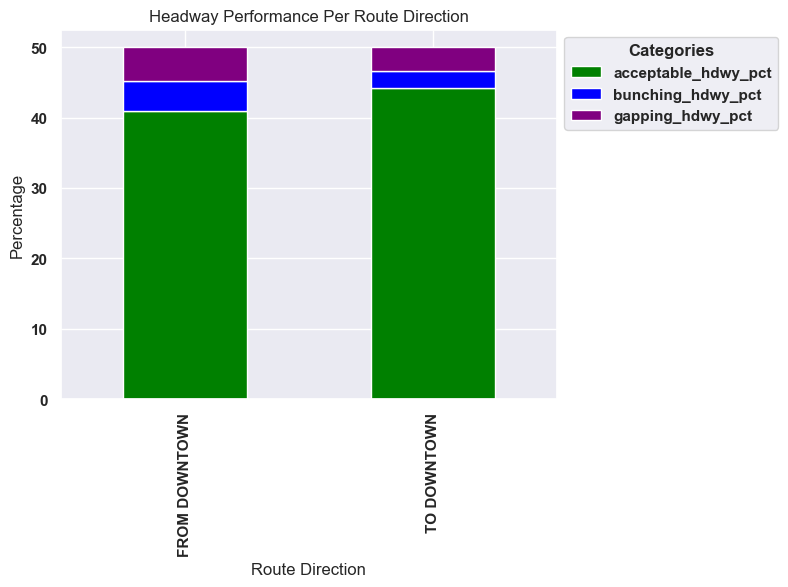

In [37]:
## Needs a little work, gotta tweak the x axis and the legend names

(rte_dir_totals[['acceptable_hdwy_pct', 'bunching_hdwy_pct', 'gapping_hdwy_pct']]).plot(kind='bar', stacked=True, color=['green', 'blue', 'purple'])
plt.xlabel('Route Direction')
plt.ylabel('Percentage')
plt.title('Headway Performance Per Route Direction')
plt.legend(title = 'Categories', bbox_to_anchor=(1, 1))

In [18]:
wegodf[['ROUTE_ABBR', 'PREV_SCHED_STOP_CANCELLED']].groupby(['ROUTE_ABBR'])['PREV_SCHED_STOP_CANCELLED']\
                                                        .value_counts()\
                                                        .reset_index(name = 'sched_stop_count')\
                                                        .sort_values(['sched_stop_count'])

,ROUTE_ABBR,PREV_SCHED_STOP_CANCELLED,sched_stop_count
3,7,1.0,203
9,50,1.0,293
11,52,1.0,472
1,3,1.0,485
13,55,1.0,521
15,56,1.0,528
7,23,1.0,535
5,22,1.0,1217
2,7,0.0,11813
4,22,0.0,17106


In [19]:
#Removing rows with PREV_SCHED_STOP_CANCELLED equal to 1.0
no_sched_stop = wegodf.query('`PREV_SCHED_STOP_CANCELLED` == 1.0')
no_sched_stop = wegodf[~(wegodf['PREV_SCHED_STOP_CANCELLED'] ==1.0)] 
no_sched_stop

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct,acceptable_hdwy,bunching_hdwy,gapping_hdwy
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,6.500000,NaN,NaN,False,False,False
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,False,False,False
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,0.0,0,12.866666,5.0,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,17.555553,True,False,False
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,NaN,0,0.000000,NaN,NaN,False,False,False
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,6.222220,True,False,False
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,58.333333,False,False,True


C:\Users\adaly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


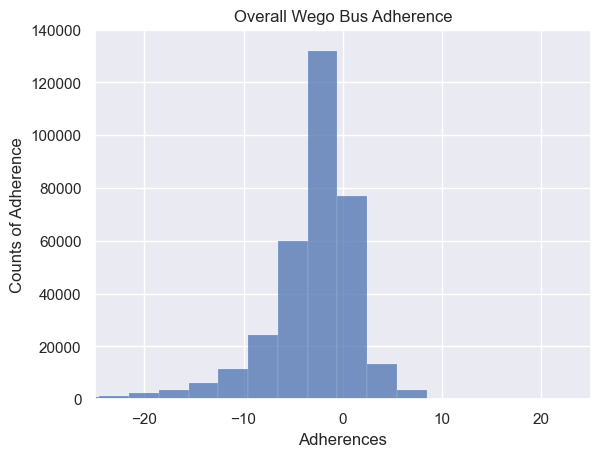

In [20]:
#Overall distribution of adherence
sns.set_theme(style="darkgrid")
sns.histplot(data=wegodf, x="ADHERENCE", binwidth=3)
plt.ylim(0, 140000)
plt.xlim(-25, 25)
plt.xlabel("Adherences")
plt.ylabel("Counts of Adherence")
plt.title("Overall Wego Bus Adherence")
plt.show()

In [ ]:
#Overall distribution of adherence with previously scheduled stops removed
sns.set_theme(style="whitegrid")
sns.histplot(data=no_sched_stop, x="ADHERENCE", binwidth=3)
plt.ylim(0, 140000)
plt.xlim(-25, 25)
plt.xlabel("Adherences")
plt.ylabel("Counts of Adherence")
plt.title("Overall Wego Bus Adherence")
plt.show()

In [ ]:
#Overall distribution of headway deviation
sns.set_theme(style="darkgrid")
sns.histplot(data=wegodf, x="HDWY_DEV", binwidth=3)
plt.ylim(0, 100000)
plt.xlim(-25, 25)
plt.xlabel("Headway Deviation")
plt.ylabel("Counts of Headway Deviation")
plt.title("Overall Wego Bus Headway Deviation")
plt.show()

#Error "Could not interpret value `hdwy_dev_pct` for parameter `x`" though wasn't getting that error before
#Overall distribution of headway deviation percentage
sns.set_theme(style="darkgrid")
sns.histplot(data=wegodf, x="hdwy_dev_pct", binwidth=3)
plt.ylim(0, 20000)
plt.xlim(-25, 25)
plt.xlabel("Headway Deviation Percentage")
plt.ylabel("Counts of Headway Deviation Percentages")
plt.title("Overall Wego Bus Headway Deviation Percentages")
plt.show()

In [ ]:
#Overall distribution of headway deviation with previously scheduled stops removed
sns.set_theme(style="whitegrid")
sns.histplot(data=no_sched_stop, x="HDWY_DEV", binwidth=3)
plt.ylim(0, 100000)
plt.xlim(-25, 25)
plt.xlabel("Headway Deviation")
plt.ylabel("Counts of Headway Deviation")
plt.title("Overall Wego Bus Headway Deviation")
plt.show()

#Error saying it can't interpret hdwy dev pct

#Overall distribution of headway deviation percentage with previously scheduled stops removed
sns.set_theme(style="whitegrid")
sns.histplot(data=no_sched_stop, x="hdwy_dev_pct", binwidth=3)
plt.ylim(0, 200000)
plt.xlim(-25, 25)
plt.xlabel("Headway Deviation Percentage")
plt.ylabel("Counts of Headway Deviation Percentages")
plt.title("Overall Wego Bus Headway Deviation Percentages")
plt.show()

Note: It is not clear in the graphs that there is any difference with/without the previously scheduled bus stops.

#Calculating headway deviation column percentages
total_hdwy_dev = wegodf['HDWY_DEV'].sum()

percentage_hdwy = (wegodf['HDWY_DEV']/total_hdwy_dev)*100

percentage_hdwy.dropna()

#Calculating scheduled headway percentages
total_sched_hdwy = wegodf['SCHEDULED_HDWY'].sum()

percentage_sched_hdwy = (wegodf['SCHEDULED_HDWY']/total_sched_hdwy)*100

percentage_sched_hdwy.dropna()

In [ ]:
#Headway deviation percentage as per read me file
wegodf['hdwy_dev_pct'] = (wegodf['HDWY_DEV']/wegodf['SCHEDULED_HDWY'])*100
wegodf.head()

## 2. How does direction of travel, route, or location affect the headway and on-time performance?

wegodf.

In [ ]:
#Looking at routes' adj ontime count 

wegodf[['ROUTE_ABBR', 'ADJUSTED_ONTIME_COUNT']].groupby(['ROUTE_ABBR'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ontime_count'])

In [ ]:
#Adding in HDWY_DEV

wegodf[['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['ROUTE_ABBR','ROUTE_DIRECTION_NAME','HDWY_DEV'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

In [ ]:
#Adding in hdwy_dev_pct

wegodf[['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'ADJUSTED_ONTIME_COUNT', 'hdwy_dev_pct']].groupby(['ROUTE_ABBR','ROUTE_DIRECTION_NAME','hdwy_dev_pct'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

In [ ]:
#Including location, aka 'BLOCK_ABBR'

wegodf[['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'BLOCK_ABBR', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['ROUTE_ABBR','ROUTE_DIRECTION_NAME','BLOCK_ABBR', 'HDWY_DEV'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

In [ ]:
#Including location, aka 'BLOCK_ABBR' with hdwy dev pct

wegodf[['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'BLOCK_ABBR', 'ADJUSTED_ONTIME_COUNT', 'hdwy_dev_pct']].groupby(['ROUTE_ABBR','ROUTE_DIRECTION_NAME','BLOCK_ABBR', 'hdwy_dev_pct'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

In [ ]:
wegodf.groupby(np.isinf(wegodf['hdwy_dev_pct'])).count()

In [ ]:
wegodf['hdwy_dev_pct'].replace([np.inf, -np.inf], np.nan, inplace=True)
wegodf.dropna(subset=['hdwy_dev_pct'], how="all", inplace=True)

In [ ]:
wegodf["hdwy_dev_pct"].head()

In [ ]:
wegodf['ROUTE_ABBR'].value_counts().sort_index()

In [ ]:
#duplicate route abbr column and call it "route name"
wegodf['ROUTE_NAME'] = wegodf.loc[:, 'ROUTE_ABBR']
wegodf.head()
#Create a dictionary that maps the route numbers and names
numbers = [3, 7, 22, 23, 50, 52, 55, 56]
names = ['West End', 'Hillsboro', 'Bordeaux', 'Dickerson Pike', 'Charlotte Pike', 'Nolensville Pike', 'Murfreesboro Pike', 'Gallatin Pike']
# create a list of tuples using enumerate()
tuples = [(numbers, names)
          for i, (numbers, names) in enumerate(zip(numbers, names))]
# convert list of tuples to dictionary using dict()
route_number_name_map = dict(tuples)
#map numbers to names to fill in route name column
wegodf['ROUTE_NAME'] = wegodf['ROUTE_NAME'].map(route_number_name_map)

In [ ]:
#Create a stacked bar chart showing the percentages of on-time busses to vs. from downtown
wego_pct = (wegodf.groupby(['ROUTE_NAME','ROUTE_DIRECTION_NAME'])['ADJUSTED_ONTIME_COUNT'].sum()/wegodf.groupby(['ROUTE_NAME'])['ADJUSTED_ONTIME_COUNT'].sum())
wego_pct.unstack().plot.barh(stacked=True)
plt.ylabel('Route Name')
plt.title('Percentages of on-time busses to/from downtown')
plt.show()

In [ ]:
#This violin chart shows the headway deviation between the 8 routes.
sns.set_theme(style="darkgrid")
sns.violinplot(x=wegodf['HDWY_DEV'], y=wegodf['ROUTE_NAME'])
plt.ylabel('Route Name')
plt.xlabel('Headway Deviation')
plt.title('Headway Deviation of the 8 Wego Bus Routes')
plt.show()
#Notice the gapping is much more pronounced overall

In [ ]:
#This violin chart shows the headway deviation pctgs between the 8 routes.
sns.set_theme(style="darkgrid")
sns.violinplot(x=wegodf['hdwy_dev_pct'], y=wegodf['ROUTE_NAME'])
plt.ylabel('Route Name')
plt.xlabel('Headway Deviation Percentage')
plt.title('Headway Deviation Percentage of the 8 Wego Bus Routes')
plt.show()

In [ ]:
#This is direction of travel effect on on-time performance by route number

each_route_with_counts_on_time_and_direction = wegodf[['ROUTE_NAME', 'ADJUSTED_ONTIME_COUNT', 'ROUTE_DIRECTION_NAME']].groupby(['ROUTE_NAME', 'ROUTE_DIRECTION_NAME']).count().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=each_route_with_counts_on_time_and_direction, x='ROUTE_NAME', y='ADJUSTED_ONTIME_COUNT', hue='ROUTE_DIRECTION_NAME')
plt.title('On-Time Performance Count by Route and Direction of Travel')
plt.xlabel('Route')
plt.ylabel('On-Time Performance Count')
plt.xticks(rotation=45)
plt.legend(title='Direction of Travel')
plt.show()

In [ ]:
#Create table with just the columns related to route and direction of travel
x = wegodf[['ROUTE_ABBR', 'ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME','ROUTE_NAME']].groupby(['ROUTE_ABBR'])[['ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME','ROUTE_NAME']]\
                                                        .value_counts()\
                                                        .reset_index(name = 'count')\
                                                        .sort_values(['ROUTE_ABBR'])
x.head()

In [ ]:
#Getting a different output for this one. Is it because I dropped the infinite values?

#create custom function that filters on route number and sums all related counts (to get the total number of trips)
def filter_by_route(num):
    filtered_list_by_route = x[x['ROUTE_ABBR']==num]
    totals = filtered_list_by_route['count'].sum()
    return totals

#test custom function:  
filter_by_route(3)

In [ ]:
#create for loop that itterates over rows to determine percentage of each variable's count over total trips
percentage = []
for index, row in x.iterrows():
    route_total = filter_by_route(x['ROUTE_ABBR'][index])
    perc = round((x['count'][index]/route_total*100),2)
    percentage.append(perc)

x['percentage'] = percentage
x.head(8)

In [ ]:
#Filter each variable (later var_df)

#on time or not?
on_time = x[x['ADJUSTED_ONTIME_COUNT']==1]
not_on_time = x[x['ADJUSTED_ONTIME_COUNT']==0]

#route direction
to_downtown = x[x['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']
from_downtown = x[x['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']

#cross_ref timeliness and route direction:
on_time_to_downtown = on_time[on_time['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']
on_time_from_downtown = on_time[on_time['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']
not_on_time_to_downtown = not_on_time[not_on_time['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']
not_on_time_from_downtown = not_on_time[not_on_time['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']

In [ ]:
#Create labeling function
def get_labels(var_df):
    labels = []
    for index,row in var_df.iterrows():
        route_name = var_df['ROUTE_NAME'][index]
        labels.append(route_name)
    return labels
#test function
get_labels(on_time_to_downtown)

In [ ]:
to_downtown

In [ ]:
#Create tree map
def tree_map(var_df,column):
    squarify.plot(var_df[column], label=get_labels(var_df))
    plt.axis('off')
    plt.show()

tree_map(on_time_to_downtown,'count')
#This ended up not being as useful, but I'm saving the code here in case I need it later

## 3. How does time of day or day of week affect headway and on-time performance?


In [ ]:
wegodf.head()

#SERVICE_ABBR: Service Type. indicates the schedule type operating that day. 1 = Weekday, 2 = Saturday, 3 = Sunday. Normally this corresponds to the day of the week, but sometimes Saturday or Sunday service will run on a weekday (i.e. during a holiday)
wegodf['SERVICE_ABBR']

In [ ]:
#Seeing route, weekday/weekend aka 'SERVICE_ABBR', HDWY_DEV, and ADJUSTED_ONTIME_COUNT

wegodf[['ROUTE_ABBR', 'SERVICE_ABBR', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['ROUTE_ABBR','SERVICE_ABBR', 'HDWY_DEV'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

In [ ]:
#Seeing route, weekday/weekend aka 'SERVICE_ABBR', hdwy_dev_pct, and ADJUSTED_ONTIME_COUNT

wegodf[['ROUTE_ABBR', 'SERVICE_ABBR', 'ADJUSTED_ONTIME_COUNT', 'hdwy_dev_pct']].groupby(['ROUTE_ABBR','SERVICE_ABBR', 'hdwy_dev_pct'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

In [ ]:
# Convert DATE column to datetime format
wegodf['DATE'] = pd.to_datetime(wegodf['DATE'])

In [ ]:
# Create DAYS_OF_THE_WEEK column
wegodf['DAYS_OF_THE_WEEK'] = wegodf['DATE'].dt.day_name()

In [ ]:
#Reordering the days of the week on the chart:
day_of_week_stats_hdwy = wegodf.groupby('DAYS_OF_THE_WEEK')['HDWY_DEV'].mean().reset_index().sort_values(by='DAYS_OF_THE_WEEK', ascending=False)
week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week_stats_hdwy['DAYS_OF_THE_WEEK'] = pd.Categorical(day_of_week_stats_hdwy['DAYS_OF_THE_WEEK'], categories=week_days, ordered=True)
day_of_week_stats_hdwy = day_of_week_stats_hdwy.sort_values('DAYS_OF_THE_WEEK')
day_of_week_stats_hdwy

In [ ]:
# Day of the week/ Headway
plt.figure(figsize=(12, 6))
sns.barplot(data=day_of_week_stats_hdwy, x='DAYS_OF_THE_WEEK', y='HDWY_DEV', label='Mean Headway Deviation', palette='coolwarm')
plt.title('Effect of Day of Week on Headway Deviation')
plt.xlabel('Day of Week')
plt.ylabel('Mean Headway Deviation')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Reordering the days of the week on the chart with hdwy_dev_pct:
day_of_week_stats_hdwy_pct = wegodf.groupby('DAYS_OF_THE_WEEK')['hdwy_dev_pct'].mean().reset_index().sort_values(by='DAYS_OF_THE_WEEK', ascending=False)
week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week_stats_hdwy_pct['DAYS_OF_THE_WEEK'] = pd.Categorical(day_of_week_stats_hdwy['DAYS_OF_THE_WEEK'], categories=week_days, ordered=True)
day_of_week_stats_hdwy_pct = day_of_week_stats_hdwy_pct.sort_values('DAYS_OF_THE_WEEK')
day_of_week_stats_hdwy_pct

In [ ]:
# Day of the week/ Headway Percentage
plt.figure(figsize=(12, 6))
sns.barplot(data=day_of_week_stats_hdwy_pct, x='DAYS_OF_THE_WEEK', y='hdwy_dev_pct', label='Mean Headway Deviation Percentage', palette='coolwarm')
plt.title('Effect of Day of Week on Headway Deviation Percentage')
plt.xlabel('Day of Week')
plt.ylabel('Mean Headway Deviation Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wegodf['ACTUAL_ARRIVAL_TIME']

In [ ]:
wegodf[['ROUTE_NAME', 'ACTUAL_ARRIVAL_TIME', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['ROUTE_NAME','ACTUAL_ARRIVAL_TIME', 'HDWY_DEV'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_NAME','ontime_count'])

In [ ]:
#With hdwy dev pct
wegodf[['ROUTE_NAME', 'ACTUAL_ARRIVAL_TIME', 'ADJUSTED_ONTIME_COUNT', 'hdwy_dev_pct']].groupby(['ROUTE_NAME','ACTUAL_ARRIVAL_TIME', 'hdwy_dev_pct'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_NAME','ontime_count'])

In [ ]:
#Add a column for hour of the day
wegodf['datehour'] = wegodf['SCHEDULED_TIME'].dt.hour

In [ ]:
#count total number of buses per hour
total_buses_in_same_hour = wegodf.groupby(['datehour'])['datehour'].count().reset_index(name='total_buses_per_hour')
#sum on_time buses per hour
on_time_buses_in_same_hour = wegodf.groupby(['datehour'])['ADJUSTED_ONTIME_COUNT'].sum().reset_index(name='total_on_time_buses_per_hour')

#merge the on_time and total buses per hour into single dataframe and rename columns
pct_buses_on_time = pd.merge(on_time_buses_in_same_hour, total_buses_in_same_hour)
pct_buses_on_time = pct_buses_on_time.rename(columns={'total_on_time_buses_per_hour': 'on_time', 'total_buses_per_hour': 'total'})
pct_buses_on_time

#add new column to calculate percentage buses that were on time in each hour time-frame
pct_buses_on_time['pct_on_time'] = round(((pct_buses_on_time.on_time/pct_buses_on_time.total)*100),2)
pct_buses_on_time

In [ ]:
#plot the percentage of on time busses per hour, omitting 
ax = pct_buses_on_time.loc[0:21].plot(x='datehour',
                    y='pct_on_time',
                    grid=True)

# Add a bold title ('\n' allow us to jump rows)
ax.set_title('% Likelihood of On Time Busses Per Hour',
             weight='bold') 

# Add label names and xticks
ax.set_ylabel('Percentage On-Time')
ax.set_xlabel('Hour of Day')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.yticks([50,55,60,65,70,75,80,85,90,95,100])

# Show the plot
plt.show()

In [ ]:
#plot the percentage of on time busses per hour, omitting midnight to 3am since there are no busses at those times
ax = pct_buses_on_time.loc[0:21].plot(x='datehour',
                    y='pct_on_time',
                    grid=True)

# Add a bold title ('\n' allow us to jump rows)
ax.set_title('% Likelihood of On Time Busses Per Hour',
             weight='bold') 

# Add label names and xticks
ax.set_ylabel('Percentage On-Time')
ax.set_xlabel('Hour of Day')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.yticks([50,55,60,65,70,75,80,85,90,95,100])

# Show the plot
plt.show()

In [ ]:
#Create new dataframe with values from the graph merged in
merged_df = wegodf.merge(pct_buses_on_time, left_on='datehour', right_on='datehour')
merged_df.head()

In [ ]:
#define a function that filters any df by specific value(s) in a column
def filter_df(df, column, *values):
    return df[df[column].isin(values)]
#test function:
filter_df(merged_df,'datehour', 14,15,16,17,18,19,20)
#note: you can put any number of values or filter on already filtered df's to create more complex filters

In [ ]:
evening_rush_hour = filter_df(merged_df,'datehour', 14,15,16,17,18,19,20)
filter_df(evening_rush_hour,'pct_on_time', )

In [ ]:
mean_on_time_performance = wegodf.groupby('TIME_POINT_ABBR')['ADJUSTED_ONTIME_COUNT'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=mean_on_time_performance, x='TIME_POINT_ABBR', y='ADJUSTED_ONTIME_COUNT', palette='coolwarm')
plt.title('Mean On-Time Performance by Location')
plt.xlabel('Location')
plt.ylabel('Mean On-Time Performance')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
#This is location effect on mean on time performance. Does it seem accurate? Should we try this in a scatter plot?

In [ ]:
mean_on_time_performance = wegodf.groupby('TIME_POINT_ABBR')['ADJUSTED_ONTIME_COUNT'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.scatterplot(data=mean_on_time_performance, x='TIME_POINT_ABBR', y='ADJUSTED_ONTIME_COUNT', palette='coolwarm')
plt.title('Mean On-Time Performance by Location')
plt.xlabel('Location')
plt.ylabel('Mean On-Time Performance')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
#This is location effect on mean on time performance. Does it seem accurate? Should we try this in a scatter plot?

In [ ]:
#count of on time busses
on_time = wegodf[wegodf['ADJUSTED_ONTIME_COUNT']==1]
#plot distruibution of on time buses by hour
sns.displot(data=on_time, x="datehour", bins=6)

In [ ]:
#count of on time busses
on_time = wegodf[wegodf['ADJUSTED_ONTIME_COUNT']==1]
#plot distruibution of on time buses by hour
sns.displot(data=on_time, x="datehour", bins=6)
#This needs to be in percentage form
x = (wegodf.groupby(['datehour'])['ADJUSTED_ONTIME_COUNT'].sum()/wegodf['ADJUSTED_ONTIME_COUNT'].count())*100
x.unstack().plot.barh(stacked=True)
plt.show()
#average percentage of busses that were on-time (adjusted count)
#x = wego['ADJUSTED_ONTIME_COUNT'].mean()
#print(format(x,'.2%'))

In [ ]:
ontime_pct = (wegodf.groupby(['ROUTE_NAME','datehour'])['ADJUSTED_ONTIME_COUNT'].sum()/wegodf['ADJUSTED_ONTIME_COUNT'].mean())
ontime_pct

#Needs tweaking, getting error "index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed"
#Create a stacked bar chart showing the percentages of on-time busses per hour of day
ontime_pct = (wegodf.groupby(['datehour'])['ADJUSTED_ONTIME_COUNT'].sum()/wegodf['ADJUSTED_ONTIME_COUNT'].mean())
ontime_pct.unstack().plot.barh(stacked=True)
plt.ylabel('Route Name')
plt.title('Percentages of On-Time Busses per Hour of Day')
plt.show()

time_of_day_stats_hdwy = wegodf.groupby('ACTUAL_ARRIVAL_TIME')['HDWY_DEV'].mean().reset_index().sort_values('ACTUAL_ARRIVAL_TIME')
plt.figure(figsize=(12, 6))
sns.barplot(data=time_of_day_stats_hdwy, x='ACTUAL_ARRIVAL_TIME', y='HDWY_DEV', label='Mean Headway Deviation', palette='coolwarm')
plt.title('Effect of Time of Day on Headway Deviation')
plt.xlabel('Time of Day')
plt.ylabel('Mean Headway Deviation')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#TRIP_EDGE: defines whether the stop is the first one on the trip (1), an intermediate stop (0), or the last one on a trip (2)
wegodf['TRIP_EDGE']

#Seeing route, morning/afternoon/evening aka 'TRIP_EDGE', HDWY_DEV, and ADJUSTED_ONTIME_COUNT

wegodf[['ROUTE_ABBR', 'TRIP_EDGE', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['ROUTE_ABBR','TRIP_EDGE', 'HDWY_DEV'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

## 4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.


In [ ]:
#Seeing operator with route and adj ontime count and hdwy dev

wegodf[['ROUTE_ABBR', 'OPERATOR', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['ROUTE_ABBR','OPERATOR', 'HDWY_DEV'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

In [ ]:
operator_effects = wegodf[['OPERATOR', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['OPERATOR', 'HDWY_DEV']).count().reset_index()
operator_effects

In [ ]:
#Seeing operator with route and adj ontime count and hdwy dev pct

wegodf[['ROUTE_ABBR', 'OPERATOR', 'ADJUSTED_ONTIME_COUNT', 'hdwy_dev_pct']].groupby(['ROUTE_ABBR','OPERATOR', 'hdwy_dev_pct'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

In [ ]:
operator_effects_pcts = wegodf[['OPERATOR', 'ADJUSTED_ONTIME_COUNT', 'hdwy_dev_pct']].groupby(['OPERATOR', 'hdwy_dev_pct']).count().reset_index()
operator_effects_pcts

In [ ]:
wegodf['OPERATOR'].nunique()

Unique bus operator ids:
1040 2374 2689 1617 2427 1892 1190 1222 2355 2125 2649 1761 1893 2041
 1170 1823 1198 1147  522 2603  409 2958 2088 2348 2706 1368 3100 2529
 1237 1992 2059 2441 1204  326 2306 2177  559 2963 1948 2230 1703 2569
 2055 2675 2752  517 2586 2623  907 1682 1619 1133  659 1266 1623 1938
 1410 1705 1927 1391 2629  304  357 2500 2112 1505 1904 2577 1052 1800
 2253 1489 1542 2624 2062  359 1582 2428  332 2967 3016 2760 2584 1206
 2399 3124 2109 1208 3012 1361 2990 1650 1359  611 1590 2832 2560  520
 2371 1175 2200 1352 2714 1500 2817 3096 1958 2458 1601 1343 1016 2217
 1866 2987 1372 2792 1330 2733 1713 1406 2780  471 2638 1780 1177 2221
 1743 3144  572 2400  341 2312  778 2697  723 2324 2164 2618 2563 2809
 2448 1762 1401 2352  414 2497 2357 2545 3088 3015 2703  624 1566 2040
 3103 1736 2765 2610 3013 1379 3127 2549 3090 1730 3087 3035 2479 3128
 2954 1865 1914 2793 2207 1277 2505 1717 2783 1598 2161 2001 2630 1997
 2585 2335 1922 1716 1842 2246 2594 2512 2600 3093 1788 2972 2254 2969
 3079 2356 3101 1782 1814 2590 1848 3020 2530 2547 3064 1792 2764 3099
 2821 3031 1824 3001 1603 1251 2053 2978 1389 2580 3102 2943 2976 2762
 2362 2151 2127 1815 2962 1419 2747  785 2531 2138 2779 2751 1078 2669
 2440 2876 3098 1838 2642 1797 1457 2432 3122 2534 2322 2368 1394 2424
 3027 2693 3129 2103 2126 2102 2567 2573  329 1867 2012 1202 2228 2694
  379 2546 2321 2082 1377 1593 1305  623 3134 2423 2033  653 2662 3080
 2435 3126 2137 1763 3116 1621 3120 2982 1606 2639 1597 1984 2313 3140
 1524 1915  465 3142 2332 3138   56 2459 3118 1596 1362 1880 2989  301
 2503  235 2178 2493 2294 1363  656    0 1673 1706 3156 1742 2464 2784
 3149 3077 2338  244 2256  473 2646 2309 2472 2094 3165 1889 2494 1845
 3173 2377  375 3166 2029

In [ ]:
wegodf['OPERATOR'].value_counts()

In [ ]:
2970/341

In [ ]:
operator_pct = (wegodf.groupby(['OPERATOR','HDWY_DEV'])['ADJUSTED_ONTIME_COUNT'].sum()/wegodf.groupby(['OPERATOR'])['ADJUSTED_ONTIME_COUNT'].sum())
operator_pct

In [ ]:
operator_hdwy_pct = (wegodf.groupby(['OPERATOR','hdwy_dev_pct'])['ADJUSTED_ONTIME_COUNT'].sum()/wegodf.groupby(['OPERATOR'])['ADJUSTED_ONTIME_COUNT'].sum())
operator_hdwy_pct

#Needs tweaking, taking incredibly long to run. have tried using HDWY_DEV and hdwy_dev_pct
operator_hdwy_pct = (wegodf.groupby(['OPERATOR','hdwy_dev_pct'])['ADJUSTED_ONTIME_COUNT'].sum()/wegodf.groupby(['OPERATOR'])['ADJUSTED_ONTIME_COUNT'].sum())
operator_hdwy_pct.unstack().plot.barh(stacked=True)
plt.ylabel('Operator')
plt.title('Percentages of On-Time Busses per Operator')
plt.show()

In [ ]:
sns.scatterplot(data=operator_effects, x="HDWY_DEV", y="ADJUSTED_ONTIME_COUNT")

In [ ]:
sns.scatterplot(data=operator_effects_pcts, x="hdwy_dev_pct", y="ADJUSTED_ONTIME_COUNT")

#Getting error "bar() missing 1 required positional argument: 'height'"

plt.bar(operator_effects['HDWY_DEV'], color='#7f6d5f', edgecolor='white', label='Headway Deviation')
plt.bar(operator_effects['ADHERENCE'], color='#557f2d', edgecolor='white', label='Adherence')
 
# Add xticks on the middle of the group bars
plt.xlabel('Operators', fontweight='bold')
 
# Create legend & Show graphic
plt.legend()
plt.show()

#Taking too long to run, something needs tweaking

#Operator effect on on-time performance and headway deviation

operator_effects = wegodf[['OPERATOR', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['OPERATOR', 'HDWY_DEV']).count().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=operator_effects, x='HDWY_DEV', y='ADJUSTED_ONTIME_COUNT', hue='OPERATOR')
plt.title('On-Time Performance Count by Bus Operator')
plt.xlabel('Operator')
plt.ylabel('On-Time Performance Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [ ]:
#Getting correlation between adherence and hdwy dev
#df['column1'].corr(df['column2'])
wegodf['ADHERENCE'].corr(wegodf['HDWY_DEV'])

In [ ]:
sns.regplot(x=wegodf["ADHERENCE"], y=wegodf["HDWY_DEV"], fit_reg= False)
plt.xlabel('Adherence')
plt.ylabel('Headway Deviation')
plt.title('Correlation of Adherence and Headway Deviation')

# Stretch Goals

## 6. How much impact does being late or too spaced out at the first stop have downstream?

In [ ]:
wegodf.head()

In [ ]:
tripedge_1 = wegodf[wegodf['TRIP_EDGE'] == 1]
tripedge_1

In [ ]:
tripedge_1['ADHERENCE'].mean()

## 7. What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? Do trips with longer **scheduled** layover time have more stable headway values? 

## 8. What is the relationship between distance or time traveled since the start of a given trip and the headway deviation? Does headway become less stable the further along the route the bus has traveled?
